#  CONTENTS

### 1.) Embedding Layer for Each Team
### 2.) MODEL1 and training on regular dataset for Embeddings
### 3.) MODEL2 Shared with MODEL1
### 4.) Model Stacking
### 5.) Interpreting Final Predicted Results
### 6.) Conslusions

![topology.PNG](topology.PNG)

Based on @https://www.datacamp.com/instructors/zachmayer work

The Team1 and Team2 has very high cardinality and embeddings works well for this kind of dataset

EMBEDDINGS:

An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers. In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variables.

Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and meaningfully represent categories in the transformed space.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tourney_detailed_result = pd.read_csv('tourney_detailed_result.csv')
regular_detailed_result = pd.read_csv('regular_detailed_result.csv')
tourney_compact_result = pd.read_csv('tourney_compact_result.csv')
regular_compact_result = pd.read_csv('regular_compact_result.csv')

In [2]:
all_teams = pd.concat([pd.concat([regular_compact_result['Team2'],regular_compact_result['Team1']]),pd.concat([tourney_compact_result['Team2'],tourney_compact_result['Team1']])])

In [3]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()

all_teams = le1.fit_transform(all_teams)


In [4]:
regular_compact_result['Team1'] = le1.transform(regular_compact_result['Team1'])
regular_compact_result['Team2'] = le1.transform(regular_compact_result['Team2'])
tourney_compact_result['Team1'] = le1.transform(tourney_compact_result['Team1'])
tourney_compact_result['Team2'] = le1.transform(tourney_compact_result['Team2'])

In [5]:
regular_compact_result.head()

,Team1,Team1Home,Team2,score_diff
0,303,1,302,26.0
1,261,1,209,10.0
2,282,1,242,38.0
3,366,1,349,6.0
4,3,1,305,6.0


#MODEL MAKING

### 1.) Embedding Layer for  Each Team

The embedding layer is a lot like a dictionary,the model learns the values for each key.The model will be reusable, so it can use it in two places in final model.

The team strength lookup has three components: an input, an embedding layer, and a flatten layer that creates the output.

In [6]:
from keras.layers import Embedding
n_teams = regular_compact_result['Team1'].nunique()

team_embedd = Embedding(
                        input_dim=n_teams,
                        output_dim=1,
                        input_length=1
                       )

Using TensorFlow backend.


###  2.)Creating TeamStrenght Model and training on regular dataset for Embeddings

Now we need make embedding learn using neural networks by supervision task.The embeddings form the weights — of the network which are adjusted to minimize loss on the task. The resulting embedded vectors are representations of categories where similar categories — relative to the task — are closer to one another.

In [7]:

from keras.layers import Input, Embedding, Flatten,Subtract,Concatenate,Dense
from keras.models import Model

teamid_in = Input(shape=(1,))                              # Create an input layer for the team ID
strength_lookup = team_embedd(teamid_in)
strength_lookup_flat = Flatten()(strength_lookup)          # Flatten the output

team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:

team_in_1 = Input((1,),name = "Team-1-In")                        # Separate input layer for 2 Teams
team_in_2 = Input((1,),name = "Team-2-In")


team_1_strength = team_strength_model(team_in_1)                  
team_2_strength = team_strength_model(team_in_2)                  

score_diff = Subtract()([team_1_strength, team_2_strength])       # Subtraction layer
model1 = Model([team_in_1, team_in_2], score_diff
                      ,name='model1')                               # Create the model
model1.compile(optimizer  = 'adam', loss = 'mean_absolute_error')  # Compile the model



#  MODEL1 TOPOLOGY

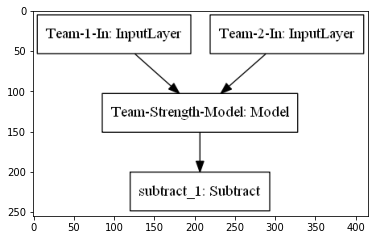

In [9]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

plot_model(model1, to_file='model1.png')
data = plt.imread('model1.png')
plt.imshow(data)
plt.show()

In [10]:


input_1 = regular_compact_result['Team1']                         # Get the team_1 column from the regular season data
input_2 = regular_compact_result['Team2']

history = model1.fit(
          [input_1,input_2],regular_compact_result['score_diff'],          # Fitting Model   
          epochs=300,
          batch_size=512,
          validation_split=0.1,
          verbose=True
          )




Train on 150192 samples, validate on 16688 samples
Epoch 1/300
150192/150192 [==============================] - 0s 2us/step - loss: 12.1023 - val_loss: 11.8515
Epoch 2/300
150192/150192 [==============================] - 0s 2us/step - loss: 12.0631 - val_loss: 11.8169
Epoch 3/300
150192/150192 [==============================] - 0s 2us/step - loss: 12.0240 - val_loss: 11.7824
Epoch 4/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.9850 - val_loss: 11.7479
Epoch 5/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.9462 - val_loss: 11.7140
Epoch 6/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.9082 - val_loss: 11.6809
Epoch 7/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.8710 - val_loss: 11.6484
Epoch 8/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.8347 - val_loss: 11.6168
Epoch 9/300
150192/150192 [==============================] - 0s 2us/step - l

150192/150192 [==============================] - 0s 2us/step - loss: 10.3497 - val_loss: 10.3897
Epoch 148/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3480 - val_loss: 10.3886
Epoch 149/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3464 - val_loss: 10.3875
Epoch 150/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3447 - val_loss: 10.3865
Epoch 151/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3432 - val_loss: 10.3856
Epoch 152/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3416 - val_loss: 10.3847
Epoch 153/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3401 - val_loss: 10.3838
Epoch 154/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3385 - val_loss: 10.3829
Epoch 155/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.3371 - val_loss: 10.3821
Epoch 156/300
1

Epoch 221/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2860 - val_loss: 10.3623
Epoch 222/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2857 - val_loss: 10.3621
Epoch 223/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2853 - val_loss: 10.3621
Epoch 224/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2850 - val_loss: 10.3621
Epoch 225/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2847 - val_loss: 10.3621
Epoch 226/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2844 - val_loss: 10.3621
Epoch 227/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2841 - val_loss: 10.3619
Epoch 228/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2837 - val_loss: 10.3618
Epoch 229/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2835 - val_loss: 10.3619
E

Epoch 295/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2725 - val_loss: 10.3651
Epoch 296/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2724 - val_loss: 10.3653
Epoch 297/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2724 - val_loss: 10.3653
Epoch 298/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2723 - val_loss: 10.3653
Epoch 299/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2722 - val_loss: 10.3654
Epoch 300/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2721 - val_loss: 10.3655


###  3.Creating new Model Shared with TeamStrenght Model(previous model)

Including Home variable for training and sharing MODEL1

In [11]:
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')                # Input for each team
home_in = Input(shape=(1,), name='Home-In')                    # input for home vs away

team_1_strength = team_strength_model(team_in_1)               # Lookup the team inputs in the team strength model
team_2_strength = team_strength_model(team_in_2)

out = Concatenate()([team_1_strength, team_2_strength, home_in])       # Concating team strengths with the home input
out = Dense(1)(out)                                                    #using a Concatenate layer, then add a Dense layer

In [12]:
model2 = Model([team_in_1,team_in_2,home_in], out,name='model2')
model2.compile(optimizer  = 'adam', loss = 'mean_absolute_error') 

# MODEL2 TOPOLOGY

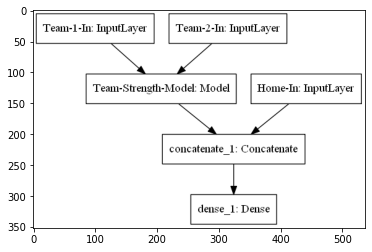

In [13]:
plot_model(model2, to_file='model1.png')
data = plt.imread('model1.png')
plt.imshow(data)
plt.show()

In [14]:
# Fit the model to the games_season dataset
model2.fit(
          [regular_compact_result['Team1'], regular_compact_result['Team2'], regular_compact_result['Team1Home']],   # Fit the model to input 1 and 2,
          regular_compact_result['score_diff'],
          epochs=300,
          verbose=True,
          validation_split=0.1,
          batch_size=512)

# Evaluate the model on the games_tourney dataset
print(model2.evaluate([tourney_compact_result['Team1'], tourney_compact_result['Team2'], tourney_compact_result['Team1Home']], 
                     tourney_compact_result['score_diff'], verbose=False))

Train on 150192 samples, validate on 16688 samples
Epoch 1/300
150192/150192 [==============================] - 0s 3us/step - loss: 11.9909 - val_loss: 11.5992
Epoch 2/300
150192/150192 [==============================] - 0s 2us/step - loss: 11.2189 - val_loss: 11.2329
Epoch 3/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.6468 - val_loss: 11.0007
Epoch 4/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.2778 - val_loss: 10.8869
Epoch 5/300
150192/150192 [==============================] - 0s 2us/step - loss: 10.0754 - val_loss: 10.8457
Epoch 6/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.9787 - val_loss: 10.8423
Epoch 7/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.9349 - val_loss: 10.8503
Epoch 8/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.9139 - val_loss: 10.8533
Epoch 9/300
150192/150192 [==============================] - 0s 2us/step - loss:

150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6945
Epoch 150/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8551 - val_loss: 10.6969
Epoch 151/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6946
Epoch 152/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6956
Epoch 153/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6997
Epoch 154/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8551 - val_loss: 10.6918
Epoch 155/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8549 - val_loss: 10.6962
Epoch 156/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6958
Epoch 157/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8552 - val_loss: 10.6963
Epoch 158/300
150192/150

150192/150192 [==============================] - 0s 3us/step - loss: 9.8550 - val_loss: 10.6899
Epoch 298/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8549 - val_loss: 10.6926
Epoch 299/300
150192/150192 [==============================] - 0s 3us/step - loss: 9.8548 - val_loss: 10.6928
Epoch 300/300
150192/150192 [==============================] - 0s 2us/step - loss: 9.8550 - val_loss: 10.6954
11.085370449318667


In [15]:
tourney_compact_result.head()

,Team1,Team1Home,Team2,score_diff,seed_diff
0,94,0,225,5,-2
1,278,0,94,7,3
2,319,0,14,11,12
3,46,0,340,7,3
4,329,0,139,6,5


###  4.Model Stacking

Model trained on regular season dataset with embeddings will now used to predict the tourney results and then Creating another model trained on tourney dataset with previous model predictions would yield better results

In [16]:
tourney_compact_result['pred'] = model2.predict([tourney_compact_result['Team1'],tourney_compact_result['Team2'],tourney_compact_result['Team1Home']])

In [17]:
tourney_compact_result.head()

,Team1,Team1Home,Team2,score_diff,seed_diff,pred
0,94,0,225,5,-2,12.869752
1,278,0,94,7,3,-5.802369
2,319,0,14,11,12,1.195266
3,46,0,340,7,3,-2.128522
4,329,0,139,6,5,-12.711473


In [18]:
#spitting tourney into train and test
train = tourney_compact_result.sample(n = int(len(tourney_compact_result)*0.7))
test = tourney_compact_result[~tourney_compact_result.isin(train)].dropna()

# MODEL3 TOPOLOGY

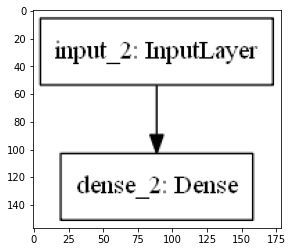

In [25]:
plot_model(model3, to_file='model3.png')
data = plt.imread('model3.png')
plt.imshow(data)
plt.show()

In [19]:
input_tensor = Input((3,))

output_tensor = Dense(1)(input_tensor)
model3 = Model(input_tensor, output_tensor)
model3.compile(optimizer='adam', loss='mean_absolute_error')

model3.fit(train[['Team1Home', 'seed_diff', 'pred']],
          train['score_diff'],
          epochs=1300,
          verbose=True)

Epoch 1/1300
1575/1575 [==============================] - 0s 61us/step - loss: 16.5451
Epoch 2/1300
1575/1575 [==============================] - 0s 25us/step - loss: 16.1275
Epoch 3/1300
1575/1575 [==============================] - 0s 24us/step - loss: 15.7174
Epoch 4/1300
1575/1575 [==============================] - 0s 25us/step - loss: 15.3133
Epoch 5/1300
1575/1575 [==============================] - 0s 25us/step - loss: 14.9238
Epoch 6/1300
1575/1575 [==============================] - 0s 25us/step - loss: 14.5444
Epoch 7/1300
1575/1575 [==============================] - 0s 25us/step - loss: 14.1829
Epoch 8/1300
1575/1575 [==============================] - 0s 23us/step - loss: 13.8311
Epoch 9/1300
1575/1575 [==============================] - 0s 25us/step - loss: 13.4826
Epoch 10/1300
1575/1575 [==============================] - 0s 25us/step - loss: 13.1494
Epoch 11/1300
1575/1575 [==============================] - 0s 27us/step - loss: 12.8361
Epoch 12/1300
1575/1575 [================

Epoch 95/1300
1575/1575 [==============================] - 0s 22us/step - loss: 8.0652
Epoch 96/1300
1575/1575 [==============================] - 0s 23us/step - loss: 8.0565
Epoch 97/1300
1575/1575 [==============================] - 0s 22us/step - loss: 8.0453
Epoch 98/1300
1575/1575 [==============================] - 0s 23us/step - loss: 8.0359
Epoch 99/1300
1575/1575 [==============================] - 0s 23us/step - loss: 8.0259
Epoch 100/1300
1575/1575 [==============================] - 0s 22us/step - loss: 8.0165
Epoch 101/1300
1575/1575 [==============================] - 0s 24us/step - loss: 8.0060
Epoch 102/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.9969
Epoch 103/1300
1575/1575 [==============================] - 0s 24us/step - loss: 7.9869
Epoch 104/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.9785
Epoch 105/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.9665
Epoch 106/1300
1575/1575 [===========

1575/1575 [==============================] - 0s 23us/step - loss: 7.2303
Epoch 189/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.2227
Epoch 190/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.2151
Epoch 191/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.2073
Epoch 192/1300
1575/1575 [==============================] - 0s 24us/step - loss: 7.1991
Epoch 193/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.1918
Epoch 194/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.1849
Epoch 195/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.1762
Epoch 196/1300
1575/1575 [==============================] - 0s 23us/step - loss: 7.1687
Epoch 197/1300
1575/1575 [==============================] - 0s 22us/step - loss: 7.1607
Epoch 198/1300
1575/1575 [==============================] - 0s 25us/step - loss: 7.1517
Epoch 199/1300
1575/1575 [=====================

Epoch 281/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.6333
Epoch 282/1300
1575/1575 [==============================] - 0s 27us/step - loss: 6.6291
Epoch 283/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.6243
Epoch 284/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.6187
Epoch 285/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.6144
Epoch 286/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.6101
Epoch 287/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.6062
Epoch 288/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.6009
Epoch 289/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.5966
Epoch 290/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.5917
Epoch 291/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.5870
Epoch 292/1300
1575/1575 [======

1575/1575 [==============================] - 0s 23us/step - loss: 6.3376
Epoch 375/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3348
Epoch 376/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3348
Epoch 377/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3315
Epoch 378/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.3297
Epoch 379/1300
1575/1575 [==============================] - 0s 27us/step - loss: 6.3285
Epoch 380/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3259
Epoch 381/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3236
Epoch 382/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3223
Epoch 383/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.3205
Epoch 384/1300
1575/1575 [==============================] - 0s 26us/step - loss: 6.3184
Epoch 385/1300
1575/1575 [=====================

1575/1575 [==============================] - 0s 23us/step - loss: 6.1767
Epoch 561/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1755
Epoch 562/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1756
Epoch 563/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1753
Epoch 564/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1750
Epoch 565/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1750
Epoch 566/1300
1575/1575 [==============================] - 0s 26us/step - loss: 6.1748
Epoch 567/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1741
Epoch 568/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1753
Epoch 569/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1747
Epoch 570/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1740
Epoch 571/1300
1575/1575 [=====================

1575/1575 [==============================] - 0s 23us/step - loss: 6.1567
Epoch 747/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1558
Epoch 748/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1559
Epoch 749/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1561
Epoch 750/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.1563
Epoch 751/1300
1575/1575 [==============================] - 0s 37us/step - loss: 6.1564
Epoch 752/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1559
Epoch 753/1300
1575/1575 [==============================] - 0s 20us/step - loss: 6.1563
Epoch 754/1300
1575/1575 [==============================] - 0s 21us/step - loss: 6.1566
Epoch 755/1300
1575/1575 [==============================] - 0s 20us/step - loss: 6.1559
Epoch 756/1300
1575/1575 [==============================] - 0s 27us/step - loss: 6.1561
Epoch 757/1300
1575/1575 [=====================

1575/1575 [==============================] - 0s 26us/step - loss: 6.1541
Epoch 933/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.1536
Epoch 934/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1536
Epoch 935/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.1541
Epoch 936/1300
1575/1575 [==============================] - 0s 27us/step - loss: 6.1533
Epoch 937/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.1542
Epoch 938/1300
1575/1575 [==============================] - 0s 25us/step - loss: 6.1540
Epoch 939/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1544
Epoch 940/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1552
Epoch 941/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1548
Epoch 942/1300
1575/1575 [==============================] - 0s 21us/step - loss: 6.1538
Epoch 943/1300
1575/1575 [=====================

Epoch 1116/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1532
Epoch 1117/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1533
Epoch 1118/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1538
Epoch 1119/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1530
Epoch 1120/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1541
Epoch 1121/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1530
Epoch 1122/1300
1575/1575 [==============================] - 0s 24us/step - loss: 6.1532
Epoch 1123/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1528
Epoch 1124/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1534
Epoch 1125/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1534
Epoch 1126/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1537
Epoch 1127/1300
1575/

1575/1575 [==============================] - 0s 23us/step - loss: 6.1533
Epoch 1209/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1535
Epoch 1210/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1536
Epoch 1211/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1533
Epoch 1212/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1532
Epoch 1213/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1538
Epoch 1214/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1533
Epoch 1215/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1528
Epoch 1216/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1531
Epoch 1217/1300
1575/1575 [==============================] - 0s 23us/step - loss: 6.1538
Epoch 1218/1300
1575/1575 [==============================] - 0s 22us/step - loss: 6.1537
Epoch 1219/1300
1575/1575 [==========

### 5.)Converting score_difference into WIN/LOSE RESULT

###### So we can know how many results does our model predicted correctly

In [20]:
def result(score):
    if score > 0:
       val = 1
    else:
       val = 0
    return val 

In [22]:
tst = test.copy()
tst['final_pred'] = model3.predict(test[['Team1Home', 'seed_diff', 'pred']])

tst['main_result'] = tst['score_diff'].apply(result)
tst['pred_result'] = tst['final_pred'].apply(result)

In [23]:
tst.head()

,Team1,Team1Home,Team2,score_diff,seed_diff,pred,final_pred,main_result,pred_result
6,304.0,0.0,236.0,8.0,-10.0,12.645826,13.016825,1,1
14,36.0,0.0,139.0,1.0,5.0,-19.075926,1.847257,1,1
16,143.0,0.0,208.0,22.0,-12.0,14.543771,13.896441,1,1
21,175.0,0.0,290.0,14.0,-6.0,4.787265,10.195307,1,1
22,73.0,0.0,341.0,4.0,7.0,-5.585682,4.991255,1,1


In [24]:
from sklearn.metrics import confusion_matrix as cm
cm_mat = cm(tst['main_result'],tst['main_result'])
print(cm_mat)

[[331   0]
 [  0 345]]


## 6.Conslusions:

####  From confusion matrix it can interpreted that the model has predicted with 99.9% accuracy.
####  Stacking and Creating Topology of Embedding using keras with respect to type of data made this much accuracy possible